In [1]:
import os,sys
from pmtool.ToolBox import ToolBox
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

%matplotlib inline

In [1]:
parameters = {'data_path': r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\manifest-1649682145244\NSCLC-Radiomics', # path to your DICOM data
              'data_type': 'dcm', # original data format: DICOM
              'multi_rts_per_pat': False}   # when False, it will look only for 1 rtstruct in the patient folder, 
                                            # this will speed up the process, 
                                            # if you have more then 1 rtstruct per patient, set it to True
data_dcms = ToolBox(**parameters)
print("it ran")

  0%|          | 0/423 [00:00<?, ?it/s]C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\pmtool\DataSet.py:98: UserWarning: No dcm data found for patient:LICENSE check the folder, ensure that dicom files ends with .dcm
  warn('No dcm data found for patient:%s check the folder, ensure that dicom files ends with .dcm'%patient)
100%|██████████| 423/423 [03:04<00:00,  2.29it/s]

it ran


In [2]:
dataset_description = data_dcms.get_dataset_description() 
dataset_description.head(10)

Patients processed: 100%|██████████| 422/422 [06:51<00:00,  1.03it/s]


,Modality,SliceThickness,PixelSpacing,SeriesDate,Manufacturer,patient,slice#
0,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,0
1,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,1
2,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,2
3,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,3
4,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,4
5,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,5
6,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,6
7,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,7
8,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,8
9,CT,3.0,"[0.9765625, 0.9765625]",20080918,SIEMENS,LUNG1-001_1-1,9


In [3]:
print('Unique modalities found: ', np.unique(dataset_description.Modality.values)[0])

Unique modalities found:  CT


In [4]:
ct_dcms = ToolBox(**parameters)
dataset_description = ct_dcms.get_dataset_description('CT') 
dataset_description.head(10)

  0%|          | 0/423 [00:00<?, ?it/s]C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\pmtool\DataSet.py:98: UserWarning: No dcm data found for patient:LICENSE check the folder, ensure that dicom files ends with .dcm
  warn('No dcm data found for patient:%s check the folder, ensure that dicom files ends with .dcm'%patient)
Patients processed: 100%|██████████| 422/422 [08:01<00:00,  1.14s/it]


,PatientName,ConvolutionKernel,SliceThickness,PixelSpacing,KVP,Exposure,XRayTubeCurrent,SeriesDate,patient,slice#
0,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,0
1,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,1
2,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,2
3,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,3
4,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,4
5,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,5
6,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,6
7,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,7
8,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,8
9,"(L, U, N, G, 1, -, 0, 0, 1)",B19f,3.0,"[0.9765625, 0.9765625]",120.0,400,80,20080918,LUNG1-001_1-1,9


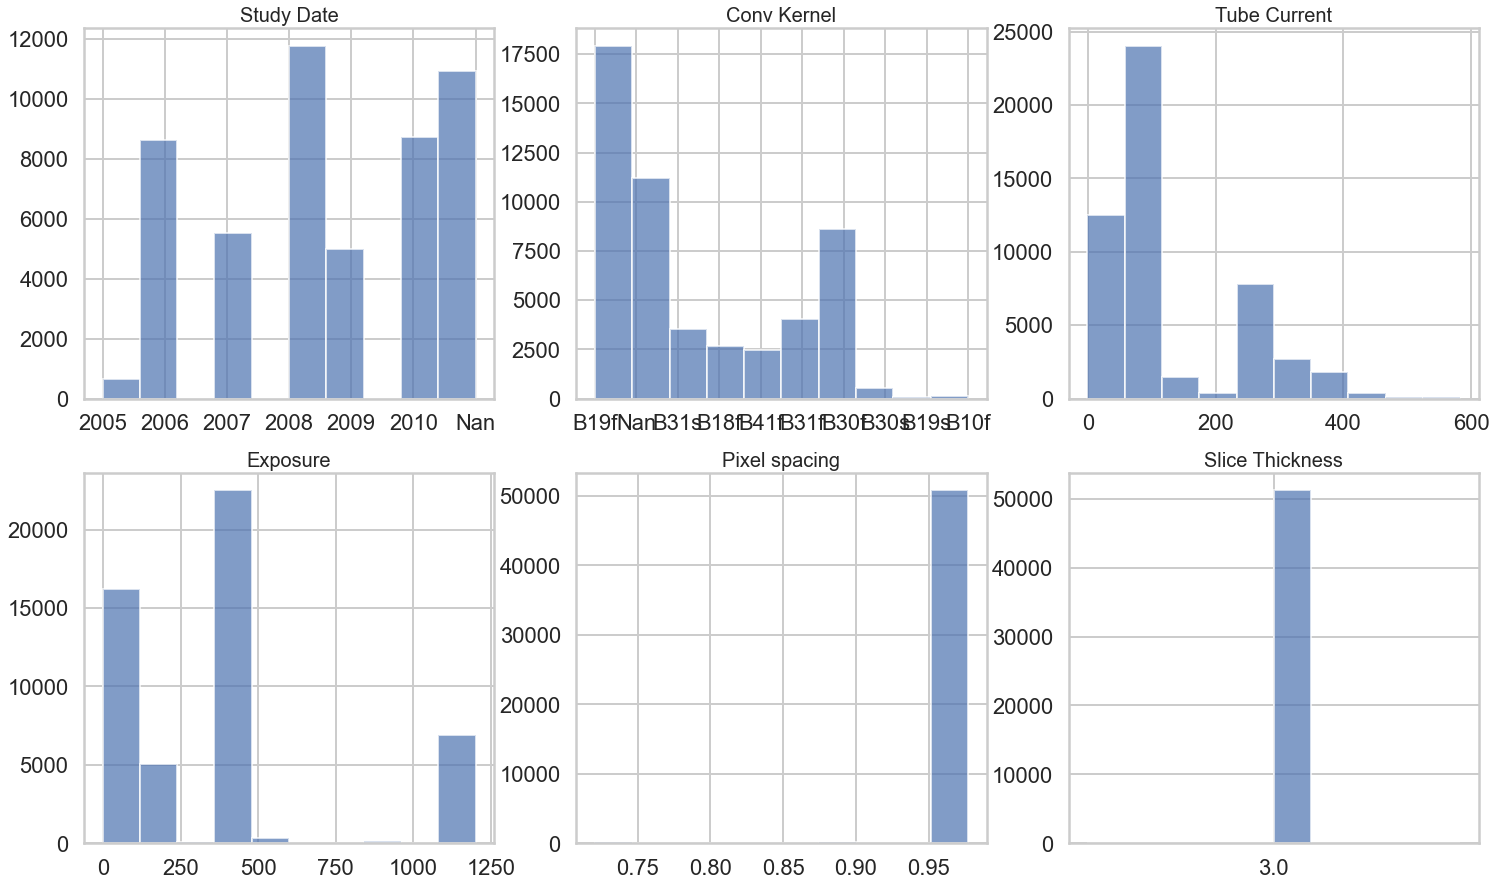

In [5]:
sb.set(context='poster', style='whitegrid')

study_date = sorted([ 'Nan' if x=='' or x=='NaN' else str(x[0:4]) for x in list(dataset_description['SeriesDate'])])[2:]
conv_kernel =['Nan' if x=='' or x=='NaN' else x for x in list(dataset_description['ConvolutionKernel'])]
tube_current =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['XRayTubeCurrent'])]
exposure =[-1 if x=='' or x=='NaN' else x for x in list(dataset_description['Exposure'])]
ps = sorted([(x[0]) for x in list(filter(lambda x: x != 'NaN', dataset_description['PixelSpacing'].values))])
sl_th = sorted([str(x)[0:3] for x in list(filter(lambda x: x != 'NaN', dataset_description['SliceThickness'].values))])
figures,descriptions = [study_date,conv_kernel,tube_current,exposure,ps,sl_th],['Study Date','Conv Kernel','Tube Current','Exposure','Pixel spacing','Slice Thickness']

fig,ax = plt.subplots(2,3,figsize=(25,15))
for i in range(2):
    for j in range(3):
        ax[i,j].hist(figures.pop(0),alpha=0.7)
        ax[i,j].set_title(descriptions.pop(0),fontsize=20)

In [6]:
qc_params = {'specific_modality': 'ct', # target modality: CT
            'thickness_range': [2,5], # slice thickness should be in range of 2..5 mm
            'spacing_range': [0.5,1.25], # pixel spacing should be in range of 0.5..1.25 mm
            'scan_length_range': [5,170], # scan should contain from 5 to 170 slices
            'axial_res': [512,512], # the axial resolution should be 512x512
            'kernels_list': ['standard','lung','b19f']} # the following kernels are acceptable

In [7]:
qc_dataframe = ct_dcms.get_quality_checks(qc_params)

  0%|          | 2/422 [00:01<04:24,  1.59it/s]

Cannot perform conv kernel check for pat: LUNG1-002_1-1


  1%|          | 3/422 [00:01<03:58,  1.75it/s]

Cannot perform conv kernel check for pat: LUNG1-003_1-1


  1%|          | 5/422 [00:02<03:33,  1.95it/s]

Cannot perform conv kernel check for pat: LUNG1-005_1-1


  1%|▏         | 6/422 [00:03<04:06,  1.69it/s]

Cannot perform conv kernel check for pat: LUNG1-006_1-1


  2%|▏         | 8/422 [00:04<04:06,  1.68it/s]

Cannot perform conv kernel check for pat: LUNG1-008_1-1


  2%|▏         | 9/422 [00:05<03:54,  1.76it/s]

Cannot perform conv kernel check for pat: LUNG1-009_1-1


  2%|▏         | 10/422 [00:05<03:34,  1.92it/s]

Cannot perform conv kernel check for pat: LUNG1-010_1-1


  3%|▎         | 11/422 [00:06<03:21,  2.04it/s]

Cannot perform conv kernel check for pat: LUNG1-011_1-1


  3%|▎         | 12/422 [00:06<03:21,  2.04it/s]

Cannot perform conv kernel check for pat: LUNG1-012_1-1


  3%|▎         | 14/422 [00:07<03:23,  2.01it/s]

Cannot perform conv kernel check for pat: LUNG1-014_1-1


  4%|▎         | 15/422 [00:08<03:29,  1.94it/s]

Cannot perform conv kernel check for pat: LUNG1-015_1-1


  4%|▍         | 16/422 [00:08<03:15,  2.08it/s]

Cannot perform conv kernel check for pat: LUNG1-016_1-1


  4%|▍         | 17/422 [00:09<03:27,  1.96it/s]

Cannot perform conv kernel check for pat: LUNG1-017_1-1


  4%|▍         | 18/422 [00:09<03:30,  1.92it/s]

Cannot perform conv kernel check for pat: LUNG1-018_1-1


  5%|▍         | 19/422 [00:10<03:23,  1.98it/s]

Cannot perform conv kernel check for pat: LUNG1-019_1-1


  5%|▍         | 20/422 [00:10<03:47,  1.76it/s]

Cannot perform conv kernel check for pat: LUNG1-020_1-1


  5%|▍         | 21/422 [00:11<04:34,  1.46it/s]

Cannot perform conv kernel check for pat: LUNG1-021_1-1


  5%|▌         | 22/422 [00:12<04:21,  1.53it/s]

Cannot perform conv kernel check for pat: LUNG1-022_1-1


  5%|▌         | 23/422 [00:12<04:09,  1.60it/s]

Cannot perform conv kernel check for pat: LUNG1-023_1-1


  6%|▌         | 24/422 [00:13<03:48,  1.74it/s]

Cannot perform conv kernel check for pat: LUNG1-024_1-1


  6%|▌         | 25/422 [00:13<03:37,  1.83it/s]

Cannot perform conv kernel check for pat: LUNG1-025_1-1


  6%|▌         | 26/422 [00:14<03:33,  1.85it/s]

Cannot perform conv kernel check for pat: LUNG1-026_1-1


  6%|▋         | 27/422 [00:14<03:29,  1.89it/s]

Cannot perform conv kernel check for pat: LUNG1-027_1-1


  7%|▋         | 28/422 [00:15<03:25,  1.92it/s]

Cannot perform conv kernel check for pat: LUNG1-028_1-1


  7%|▋         | 30/422 [00:16<03:30,  1.86it/s]

Cannot perform conv kernel check for pat: LUNG1-030_1-1


  7%|▋         | 31/422 [00:17<03:56,  1.65it/s]

Cannot perform conv kernel check for pat: LUNG1-031_1-1


  8%|▊         | 33/422 [00:18<04:03,  1.60it/s]

Cannot perform conv kernel check for pat: LUNG1-033_1-1


  8%|▊         | 34/422 [00:19<03:41,  1.75it/s]

Cannot perform conv kernel check for pat: LUNG1-034_1-1


  8%|▊         | 35/422 [00:19<03:28,  1.86it/s]

Cannot perform conv kernel check for pat: LUNG1-035_1-1


  9%|▉         | 37/422 [00:20<03:42,  1.73it/s]

Cannot perform conv kernel check for pat: LUNG1-037_1-1


  9%|▉         | 38/422 [00:21<04:15,  1.50it/s]

Cannot perform conv kernel check for pat: LUNG1-038_1-1


  9%|▉         | 39/422 [00:22<03:48,  1.68it/s]

Cannot perform conv kernel check for pat: LUNG1-039_1-1


  9%|▉         | 40/422 [00:22<03:32,  1.80it/s]

Cannot perform conv kernel check for pat: LUNG1-040_1-1


 10%|▉         | 41/422 [00:23<03:22,  1.88it/s]

Cannot perform conv kernel check for pat: LUNG1-041_1-1


 10%|▉         | 42/422 [00:23<03:12,  1.98it/s]

Cannot perform conv kernel check for pat: LUNG1-042_1-1


 10%|█         | 43/422 [00:24<03:07,  2.02it/s]

Cannot perform conv kernel check for pat: LUNG1-043_1-1


 10%|█         | 44/422 [00:24<03:26,  1.83it/s]

Cannot perform conv kernel check for pat: LUNG1-044_1-1


 11%|█         | 45/422 [00:25<03:22,  1.86it/s]

Cannot perform conv kernel check for pat: LUNG1-045_1-1


 11%|█         | 46/422 [00:25<03:07,  2.01it/s]

Cannot perform conv kernel check for pat: LUNG1-046_1-1


 11%|█         | 47/422 [00:26<03:09,  1.98it/s]

Cannot perform conv kernel check for pat: LUNG1-047_1-1


 12%|█▏        | 49/422 [00:27<03:26,  1.80it/s]

Cannot perform conv kernel check for pat: LUNG1-049_1-1


 12%|█▏        | 50/422 [00:27<03:19,  1.86it/s]

Cannot perform conv kernel check for pat: LUNG1-050_1-1


 12%|█▏        | 52/422 [00:29<03:29,  1.76it/s]

Cannot perform conv kernel check for pat: LUNG1-052_1-1


 13%|█▎        | 53/422 [00:29<03:15,  1.89it/s]

Cannot perform conv kernel check for pat: LUNG1-053_1-1


 13%|█▎        | 54/422 [00:30<03:18,  1.85it/s]

Cannot perform conv kernel check for pat: LUNG1-054_1-1


 13%|█▎        | 55/422 [00:30<03:21,  1.83it/s]

Cannot perform conv kernel check for pat: LUNG1-055_1-1


 14%|█▎        | 57/422 [00:32<03:40,  1.65it/s]

Cannot perform conv kernel check for pat: LUNG1-057_1-1


 14%|█▎        | 58/422 [00:33<05:11,  1.17it/s]

Cannot perform conv kernel check for pat: LUNG1-058_1-1


 14%|█▍        | 59/422 [00:33<04:31,  1.34it/s]

Cannot perform conv kernel check for pat: LUNG1-059_1-1


 14%|█▍        | 60/422 [00:34<04:16,  1.41it/s]

Cannot perform conv kernel check for pat: LUNG1-060_1-1


 14%|█▍        | 61/422 [00:35<03:54,  1.54it/s]

Cannot perform conv kernel check for pat: LUNG1-061_1-1


 15%|█▍        | 62/422 [00:35<03:36,  1.66it/s]

Cannot perform conv kernel check for pat: LUNG1-062_1-1


 15%|█▍        | 63/422 [00:36<03:27,  1.73it/s]

Cannot perform conv kernel check for pat: LUNG1-063_1-1


 15%|█▌        | 64/422 [00:36<03:18,  1.80it/s]

Cannot perform conv kernel check for pat: LUNG1-064_1-1


 16%|█▌        | 66/422 [00:38<03:53,  1.52it/s]

Cannot perform conv kernel check for pat: LUNG1-066_1-1


 16%|█▌        | 68/422 [00:39<04:00,  1.47it/s]

Cannot perform conv kernel check for pat: LUNG1-068_1-1


 16%|█▋        | 69/422 [00:40<04:06,  1.43it/s]

Cannot perform conv kernel check for pat: LUNG1-069_1-1


 17%|█▋        | 70/422 [00:40<03:45,  1.56it/s]

Cannot perform conv kernel check for pat: LUNG1-070_1-1


 18%|█▊        | 74/422 [00:43<03:49,  1.52it/s]

Cannot perform conv kernel check for pat: LUNG1-074_1-1


 18%|█▊        | 76/422 [00:45<03:54,  1.47it/s]

Cannot perform conv kernel check for pat: LUNG1-076_1-1


 18%|█▊        | 78/422 [00:46<03:44,  1.53it/s]

Cannot perform conv kernel check for pat: LUNG1-078_1-1


 19%|█▉        | 81/422 [00:48<03:22,  1.69it/s]

Cannot perform conv kernel check for pat: LUNG1-081_1-1


 20%|██        | 85/422 [00:50<03:35,  1.57it/s]

Cannot perform conv kernel check for pat: LUNG1-085_1-1


 21%|██        | 87/422 [00:52<03:39,  1.53it/s]

Cannot perform conv kernel check for pat: LUNG1-087_1-1


 21%|██        | 88/422 [00:52<03:30,  1.58it/s]

Cannot perform conv kernel check for pat: LUNG1-088_1-1


 21%|██        | 89/422 [00:53<03:11,  1.74it/s]

Cannot perform conv kernel check for pat: LUNG1-089_1-1


 22%|██▏       | 91/422 [00:54<03:17,  1.67it/s]

Cannot perform conv kernel check for pat: LUNG1-091_1-1


 23%|██▎       | 95/422 [00:57<03:19,  1.64it/s]

Cannot perform conv kernel check for pat: LUNG1-095_1-1


 24%|██▍       | 101/422 [01:00<03:04,  1.74it/s]

Cannot perform conv kernel check for pat: LUNG1-101_1-1


 25%|██▌       | 107/422 [01:05<03:38,  1.44it/s]

Cannot perform conv kernel check for pat: LUNG1-107_1-1


 28%|██▊       | 117/422 [01:12<03:15,  1.56it/s]

Cannot perform conv kernel check for pat: LUNG1-117_1-1


 30%|██▉       | 125/422 [01:17<02:48,  1.77it/s]

Cannot perform conv kernel check for pat: LUNG1-125_1-1


 32%|███▏      | 137/422 [01:25<02:57,  1.61it/s]

Cannot perform conv kernel check for pat: LUNG1-137_1-1


 33%|███▎      | 140/422 [01:26<02:33,  1.83it/s]

Cannot perform conv kernel check for pat: LUNG1-140_1-1


 35%|███▌      | 149/422 [01:32<02:37,  1.73it/s]

Cannot perform conv kernel check for pat: LUNG1-149_1-1


 36%|███▋      | 154/422 [01:34<02:43,  1.64it/s]

Cannot perform conv kernel check for pat: LUNG1-154_1-1


 37%|███▋      | 155/422 [01:35<02:39,  1.68it/s]

Cannot perform conv kernel check for pat: LUNG1-155_1-1


 37%|███▋      | 158/422 [01:37<02:28,  1.78it/s]

Cannot perform conv kernel check for pat: LUNG1-158_1-1


 38%|███▊      | 159/422 [01:37<02:22,  1.84it/s]

Cannot perform conv kernel check for pat: LUNG1-159_1-1


 40%|████      | 170/422 [01:44<02:24,  1.74it/s]

Cannot perform conv kernel check for pat: LUNG1-170_1-1


 41%|████      | 173/422 [01:46<02:29,  1.67it/s]

Cannot perform conv kernel check for pat: LUNG1-173_1-1


 42%|████▏     | 177/422 [01:48<02:12,  1.85it/s]

Cannot perform conv kernel check for pat: LUNG1-177_1-1


 43%|████▎     | 180/422 [01:50<02:25,  1.66it/s]

Cannot perform conv kernel check for pat: LUNG1-180_1-1


 43%|████▎     | 182/422 [01:51<02:29,  1.60it/s]

Cannot perform conv kernel check for pat: LUNG1-182_1-1


 44%|████▎     | 184/422 [01:53<02:38,  1.51it/s]

Cannot perform conv kernel check for pat: LUNG1-184_1-1


 44%|████▍     | 185/422 [01:53<02:33,  1.54it/s]

Cannot perform conv kernel check for pat: LUNG1-185_1-1


 44%|████▍     | 186/422 [01:54<02:30,  1.56it/s]

Cannot perform conv kernel check for pat: LUNG1-186_1-1


 44%|████▍     | 187/422 [01:54<02:15,  1.74it/s]

Cannot perform conv kernel check for pat: LUNG1-187_1-1


 45%|████▍     | 188/422 [01:55<02:13,  1.75it/s]

Cannot perform conv kernel check for pat: LUNG1-188_1-1


 45%|████▌     | 190/422 [01:56<02:06,  1.83it/s]

Cannot perform conv kernel check for pat: LUNG1-190_1-1


 46%|████▌     | 194/422 [01:58<02:19,  1.63it/s]

Cannot perform conv kernel check for pat: LUNG1-194_1-1


 47%|████▋     | 198/422 [02:01<02:14,  1.66it/s]

Cannot perform conv kernel check for pat: LUNG1-198_1-1


 48%|████▊     | 201/422 [02:02<02:19,  1.59it/s]

Cannot perform conv kernel check for pat: LUNG1-201_1-1


 48%|████▊     | 203/422 [02:04<02:15,  1.62it/s]

Cannot perform conv kernel check for pat: LUNG1-203_1-1


 48%|████▊     | 204/422 [02:04<02:17,  1.59it/s]

Cannot perform conv kernel check for pat: LUNG1-204_1-1


 49%|████▉     | 207/422 [02:06<02:14,  1.59it/s]

Cannot perform conv kernel check for pat: LUNG1-207_1-1


 50%|████▉     | 209/422 [02:07<02:12,  1.60it/s]

Cannot perform conv kernel check for pat: LUNG1-209_1-1


 54%|█████▍    | 228/422 [02:18<01:42,  1.89it/s]

Cannot perform conv kernel check for pat: LUNG1-228_1-1


100%|██████████| 422/422 [04:24<00:00,  1.60it/s]


In [8]:
qc_dataframe

,Patient id,Modality is acceptable,Projection is axial,Complete scan (no missing/overlapping slices),Scan len is in range,Slice thickness is in range,Slice thickness is consistent,Pixel spacing is in range,Convolutional kernel tag is present,Convolutional kernel is acceptable,Axial pr. resolution is acceptable,Intensity intercept/slope tags are present
0,LUNG1-001_1-1,1,1,1,1,1,1,1,1,1,1,1
1,LUNG1-002_1-1,1,1,1,1,1,1,1,0,NaN,1,1
2,LUNG1-003_1-1,1,1,1,1,1,1,1,0,NaN,1,1
3,LUNG1-004_1-1,1,1,1,1,1,1,1,1,0,1,1
4,LUNG1-005_1-1,1,1,1,1,1,1,1,0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
417,LUNG1-418_1-1,1,1,1,1,1,1,1,1,1,1,1
418,LUNG1-419_1-1,1,1,1,1,1,1,1,1,1,1,1
419,LUNG1-420_1-1,1,1,1,1,1,1,1,1,1,1,1
420,LUNG1-421_1-1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
export_path = r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted'
region_of_interest = 'all'
data_ct = ToolBox(**parameters) 


  0%|          | 0/423 [00:00<?, ?it/s]C:\Users\MegaMert\Documents\GitHub\precision-medicine-toolbox\pmtool\DataSet.py:98: UserWarning: No dcm data found for patient:LICENSE check the folder, ensure that dicom files ends with .dcm
  warn('No dcm data found for patient:%s check the folder, ensure that dicom files ends with .dcm'%patient)
100%|██████████| 423/423 [02:59<00:00,  2.35it/s]


In [10]:
data_ct.convert_to_nrrd(export_path, 'gtv')

Patients converted: 100%|██████████| 422/422 [12:24<00:00,  1.76s/it]


In [2]:
data_ct_nrrd = ToolBox(data_path = r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted\Test', data_type='nrrd')


100%|██████████| 64/64 [00:00<00:00, 8023.06it/s]


In [ ]:
data_ct_nrrd.get_jpegs(r'C:\Users\MegaMert\Desktop\Internship files\Tutorial data\Converted') # the function will create 'images_quick_check' folder in the specified directory 

Patients processed:  78%|███████▊  | 84/108 [12:07<03:18,  8.27s/it]